# Predicting Brazilian Stock Market Values

Since the project works with brazilian data, some of the coloum names in the data set are written in portuguese


### Creating Dictionaries of Dataframes for each company

In [231]:
! pip install pandas
! pip install xlrd
! pip install openpyxl
! pip install yfinance
! pip install plotly
! pip install seaborn
! pip install nbformat
! pip install scikit-learn



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [232]:
import pandas as pd
import os

companies = ["ABEV3", "AZUL4", "BTOW3", "B3SA3", "BBSE3", "BRML3", "BBDC4", "BRAP4", "BBAS3", "BRKM5", "BRFS3", "BPAC11", "CRFB3", "CCRO3", "CMIG4", "HGTX3", "CIEL3", "COGN3", "CPLE6", "CSAN3", "CPFE3", "CVCB3", "CYRE3", "ECOR3", "ELET6", "EMBR3", "ENBR3", "ENGI11", "ENEV3", "EGIE3", "EQTL3", "EZTC3", "FLRY3", "GGBR4", "GOAU4", "GOLL4", "NTCO3", "HAPV3", "HYPE3", "IGTA3", "GNDI3", "ITSA4", "ITUB4", "JBSS3", "JHSF3", "KLBN11", "RENT3", "LCAM3", "LAME4", "LREN3", "MGLU3", "MRFG3", "BEEF3", "MRVE3", "MULT3", "PCAR3", "PETR4", "BRDT3", "PRIO3", "QUAL3", "RADL3", "RAIL3", "SBSP3", "SANB11", "CSNA3", "SULA11", "SUZB3", "TAEE11", "VIVT3", "TIMS3", "TOTS3", "UGPA3", "USIM5", "VALE3", "VVAR3", "WEGE3", "YDUQ3"]
# Fundaments = {
#     "ABEV3": balanco_dre_abev3,
#     "MGLU3": balanco_dre_mglu3
# }
fundaments = {}
files = os.listdir("balancos")
for file in files:
    
    company = file.split('_')[1].split('.')[0]

    if company in companies:
        
        # get the balance from each company
        balance = pd.read_excel(f'balancos/{file}', sheet_name=0)

        # na primeira coluna colocar o título com o nome da empresa
        balance.iloc[0, 0] = company

        # make the first line the heading
        balance.columns = balance.iloc[0]
        balance = balance[1:]

        # tornar a 1ª coluna (que agora tem o nome da emrpesa)
        balance = balance.set_index(company)
        dre = pd.read_excel(f'balancos/{file}', sheet_name=1)

        # na primeira coluna colocar o título com o nome da empresa
        dre.iloc[0, 0] = company

        # pegar 1ª linha e tornar um cabeçalho
        dre.columns = dre.iloc[0]
        dre = dre[1:]
        
        # tornar a 1ª coluna (que agora tem o nome da emrpesa)
        dre = dre.set_index(company)

        fundaments[company] = pd.concat([balance, dre])

WARNING *** file size (66667) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


WARNING *** file size (66667) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (64284) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (64284) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (64282) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (64282) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (24947) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (24947) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero

### Getting the stock price for each date 

In [233]:
stock_values_df = pd.read_excel("StockInfo.xlsx")
stock_values = {}
for company in stock_values_df["Empresa"].unique():
    stock_values[company] = stock_values_df.loc[stock_values_df['Empresa']==company, :]

In [234]:
print(len(stock_values))

77


### Removing companies with missing stock data

In [235]:
for company in companies:
    if stock_values[company].isnull().values.any():
        stock_values.pop(company)
        fundaments.pop(company)
companies = list(stock_values.keys())
print(len(companies))

65


### Grupping fundaments and stock prices of each company

In [236]:
for company in fundaments:
    table = fundaments[company].T
    table.index = pd.to_datetime(table.index, format="%d/%m/%Y")
    stock_data_table = stock_values[company].set_index("Date")
    stock_data_table = stock_data_table[["Adj Close"]]
    
    table = table.merge(stock_data_table, right_index=True, left_index=True)
    table.index.name = company
    fundaments[company] = table
display(fundaments["ABEV3"])

,Ativo Total,Ativo Circulante,Caixa e Equivalentes de Caixa,Aplicações Financeiras,Contas a Receber,Estoques,Ativos Biológicos,Tributos a Recuperar,Despesas Antecipadas,Outros Ativos Circulantes,...,Receitas,Despesas,Resultado Antes Tributação/Participações,Provisão para IR e Contribuição Social,IR Diferido,Participações/Contribuições Estatutárias,Reversão dos Juros sobre Capital Próprio,Part. de Acionistas Não Controladores,Lucro/Prejuízo do Período,Adj Close
ABEV3,,,,,,,,,,,,,,,,,,,,,
2020-12-31,125196574.72,35342614.528,17090335.744,1700028.032,4303137.792,7605904.896,0,3287141.888,293552,1062513.984,...,NaN,NaN,8464308.224,93644,-1667579.008,NaN,NaN,-104363.008,6786009.6,15.575767
2020-09-30,127056781.312,39098793.984,21660450.816,1442923.008,4156922.88,7341836.8,0,3472880.896,298303.008,725478.976,...,NaN,NaN,2431040,-415548,343476,NaN,NaN,-84167,2274800.896,12.159024
2020-06-30,121393004.544,36268126.208,17438951.424,44823,4201583.104,7771618.816,0,5390340.096,356411.008,1064401.984,...,NaN,NaN,1108173.056,-431944.992,595088,NaN,NaN,-44517,1226798.976,13.710416
2020-03-31,113687560.192,31086356.48,13204471.808,44823,3394298.112,7752655.872,0,5266407.936,447473.984,976225.024,...,NaN,NaN,1490919.936,-295032.992,15365,NaN,NaN,-119468,1091783.936,11.557861
2019-12-31,101742944.256,27621136.384,11900665.856,14558,4495524.864,5978556.928,0,4074127.104,512532,645171.968,...,NaN,NaN,3755047.68,1317924.992,-853995.008,NaN,NaN,-119273.008,4099704.832,18.102791
2019-09-30,102475317.248,29004025.856,15016913.92,14304,4236257.024,5978811.904,0,2545863.936,293060,918814.976,...,NaN,NaN,2826416.896,-649270.016,427238.016,NaN,NaN,-106708,2497677.056,18.187490
2019-06-30,98738978.816,27356035.072,14233403.392,14038,4103118.08,6197564.928,0,1542556.032,507216,758140.992,...,NaN,NaN,2980011.008,-807523.968,443414.016,NaN,NaN,-95168,2520732.928,16.902554
2019-03-31,96905535.488,26194137.088,12822524.928,13772,3980359.936,6032743.936,0,1980342.016,591273.984,773121.024,...,NaN,NaN,3381529.088,-979185.024,346724,NaN,NaN,-87218,2661850.112,15.901062
2018-12-31,94126137.344,25329604.608,11463497.728,13391,4879256.064,5401793.024,0,2148713.984,741222.016,681731.008,...,NaN,NaN,4591409.152,33055.072,-1160932.992,NaN,NaN,-103125.992,3360404.736,14.531096


### Treating columns
    
1. Select only companies with same columns
2. Deal with duplicate columns
3. Deal with missing values

#### 1. Removing companies with different columns

In [237]:
columns = list(fundaments["ABEV3"].columns)

for company in companies:
    if set(columns) != set(fundaments[company].columns):
        fundaments.pop(company)
print(len(fundaments))

61


####  2. Dealing with duplicate columns

In [238]:
columns2 = columns
columns_text = ";".join(columns2)

modified_columns = []
for column in columns2:
    if columns2.count(column) == 2 and column not in modified_columns:
        columns_text = columns_text.replace(";" + column + ";",";" + column + "_1;", 1)
        modified_columns.append(column)
columns2 = columns_text.split(';')
print(columns2)

['Ativo Total', 'Ativo Circulante', 'Caixa e Equivalentes de Caixa', 'Aplicações Financeiras', 'Contas a Receber_1', 'Estoques_1', 'Ativos Biológicos_1', 'Tributos a Recuperar', 'Despesas Antecipadas_1', 'Outros Ativos Circulantes', 'Ativo Realizável a Longo Prazo', 'Aplicações Financeiras Avaliadas a Valor Justo', 'Aplicações Financeiras Avaliadas ao Custo Amortizado', 'Contas a Receber', 'Estoques', 'Ativos Biológicos', 'Tributos Diferidos_1', 'Despesas Antecipadas', 'Créditos com Partes Relacionadas', 'Outros Ativos Não Circulantes', 'Investimentos', 'Imobilizado', 'Intangível', 'Diferido', 'Passivo Total', 'Passivo Circulante', 'Obrigações Sociais e Trabalhistas', 'Fornecedores', 'Obrigações Fiscais', 'Empréstimos e Financiamentos_1', 'Passivos com Partes Relacionadas_1', 'Dividendos e JCP a Pagar', 'Outros_1', 'Provisões_1', 'Passivos sobre Ativos Não-Correntes a Venda e Descontinuados_1', 'Passivo Não Circulante', 'Empréstimos e Financiamentos', 'Passivos com Partes Relacionadas'

In [239]:
# implementar as colunas nas tabelas

for company in fundaments:
    fundaments[company].columns = columns2

#### 3. Dealing with missing values

In [240]:
# valores_vazios = {
#     "Ativo Total": 0,
#     "Passivo Total": 0,
# }
null_values = dict.fromkeys(columns2, 0)
n_rows = 0
for company in fundaments:
    table = fundaments[company]
    n_rows += table.shape[0]
    for column in columns2:
        n_null = pd.isnull(table[column]).sum()
        null_values[column] += n_null
print(null_values)
print(n_rows)

{'Ativo Total': 0, 'Ativo Circulante': 0, 'Caixa e Equivalentes de Caixa': 0, 'Aplicações Financeiras': 0, 'Contas a Receber_1': 0, 'Estoques_1': 0, 'Ativos Biológicos_1': 0, 'Tributos a Recuperar': 0, 'Despesas Antecipadas_1': 0, 'Outros Ativos Circulantes': 0, 'Ativo Realizável a Longo Prazo': 0, 'Aplicações Financeiras Avaliadas a Valor Justo': 0, 'Aplicações Financeiras Avaliadas ao Custo Amortizado': 0, 'Contas a Receber': 0, 'Estoques': 0, 'Ativos Biológicos': 0, 'Tributos Diferidos_1': 0, 'Despesas Antecipadas': 0, 'Créditos com Partes Relacionadas': 0, 'Outros Ativos Não Circulantes': 0, 'Investimentos': 0, 'Imobilizado': 0, 'Intangível': 0, 'Diferido': 0, 'Passivo Total': 0, 'Passivo Circulante': 0, 'Obrigações Sociais e Trabalhistas': 0, 'Fornecedores': 0, 'Obrigações Fiscais': 0, 'Empréstimos e Financiamentos_1': 0, 'Passivos com Partes Relacionadas_1': 0, 'Dividendos e JCP a Pagar': 0, 'Outros_1': 0, 'Provisões_1': 0, 'Passivos sobre Ativos Não-Correntes a Venda e Descontin

In [241]:
remove_columns = []
for column in null_values:
    if null_values[column] > 50:
        remove_columns.append(column)

for company in fundaments:
    fundaments[company] = fundaments[company].drop(remove_columns, axis=1)
    fundaments[company] = fundaments[company].ffill()

In [242]:
fundaments["ABEV3"].shape

(33, 72)

### Criando tags

Rule: 
1. Grew more than Ibovespa > 0% -> Buy (tag = 2)
2. Grew less than Ibovespa > -2% -> Don't buy (tag = 1)
3. Grew menos do que o Ibovespa < -2% -> Sell (tag = 0)

In [243]:
import yfinance as yf
ibovespa = yf.Ticker('^BVSP')
ibov_df = ibovespa.history(start = '2012-12-20', end = '2021-04-20')
ibov_df.index = [pd.Timestamp(str(date).split(' ')[0]) for date in ibov_df.index]

In [244]:
ibov_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
2012-12-20,60992.0,61276.0,60622.0,61276.0,3083400,0.0,0.0
2012-12-21,61271.0,61271.0,60221.0,61007.0,3157400,0.0,0.0
2012-12-26,61003.0,61322.0,60861.0,60960.0,2598000,0.0,0.0
2012-12-27,60964.0,61191.0,60233.0,60416.0,2852600,0.0,0.0
2012-12-28,60416.0,61066.0,60416.0,60952.0,2626000,0.0,0.0
...,...,...,...,...,...,...,...
2021-04-13,118809.0,119529.0,118041.0,119297.0,8977600,0.0,0.0
2021-04-14,119298.0,120871.0,119298.0,120295.0,10076600,0.0,0.0
2021-04-15,120290.0,121409.0,120084.0,120701.0,7948100,0.0,0.0
2021-04-16,120701.0,121333.0,120199.0,121114.0,7945600,0.0,0.0


In [245]:
import numpy as np

dates = fundaments["ABEV3"].index
for date in dates:
    if date not in ibov_df.index:
        ibov_df.loc[date] = np.nan
ibov_df.sort_index(inplace=True)
ibov_df.ffill(inplace=True)
ibov_df.rename(columns={"Close": "IBOV"},inplace=True)
for company in fundaments:
    fundaments[company] = fundaments[company].merge(ibov_df[['IBOV']], left_index=True, right_index=True)
display(fundaments["ABEV3"])

,Ativo Total,Ativo Circulante,Caixa e Equivalentes de Caixa,Aplicações Financeiras,Contas a Receber_1,Estoques_1,Ativos Biológicos_1,Tributos a Recuperar,Despesas Antecipadas_1,Outros Ativos Circulantes,...,Resultado da Equivalência Patrimonial,Financeiras,Receitas Financeiras,Despesas Financeiras,Resultado Antes Tributação/Participações,Provisão para IR e Contribuição Social,IR Diferido,Lucro/Prejuízo do Período,Adj Close,IBOV
2020-12-31,1.251966e+08,3.534261e+07,1.709034e+07,1700028.032,4303137.792,7605904.896,0,3287141.888,293552.000,1062513.984,...,-9428,1040928.960,2144160.000,-1103231.104,8464308.224,93644.000,-1667579.008,6786009.600,15.575767,119306.0
2020-09-30,1.270568e+08,3.909879e+07,2.166045e+07,1442923.008,4156922.880,7341836.800,0,3472880.896,298303.008,725478.976,...,-11002,-1144775.936,369476.992,-1514253.056,2431040.000,-415548.000,343476.000,2274800.896,12.159024,94603.0
2020-06-30,1.213930e+08,3.626813e+07,1.743895e+07,44823.000,4201583.104,7771618.816,0,5390340.096,356411.008,1064401.984,...,-16237,-793734.976,236606.000,-1030340.992,1108173.056,-431944.992,595088.000,1226798.976,13.710416,95056.0
2020-03-31,1.136876e+08,3.108636e+07,1.320447e+07,44823.000,3394298.112,7752655.872,0,5266407.936,447473.984,976225.024,...,-6617,-1536866.944,245776.000,-1782642.944,1490919.936,-295032.992,15365.000,1091783.936,11.557861,73020.0
2019-12-31,1.017429e+08,2.762114e+07,1.190067e+07,14558.000,4495524.864,5978556.928,0,4074127.104,512532.000,645171.968,...,-11195,-1564263.936,234065.056,-1798328.832,3755047.680,1317924.992,-853995.008,4099704.832,18.102791,115964.0
2019-09-30,1.024753e+08,2.900403e+07,1.501691e+07,14304.000,4236257.024,5978811.904,0,2545863.936,293060.000,918814.976,...,-8248,-305798.016,867204.992,-1173003.008,2826416.896,-649270.016,427238.016,2497677.056,18.187490,104745.0
2019-06-30,9.873898e+07,2.735604e+07,1.423340e+07,14038.000,4103118.080,6197564.928,0,1542556.032,507216.000,758140.992,...,-731,-567436.992,249903.008,-817340.032,2980011.008,-807523.968,443414.016,2520732.928,16.902554,100967.0
2019-03-31,9.690554e+07,2.619414e+07,1.282252e+07,13772.000,3980359.936,6032743.936,0,1980342.016,591273.984,773121.024,...,-2136,-672067.968,287692.992,-959761.024,3381529.088,-979185.024,346724.000,2661850.112,15.901062,95415.0
2018-12-31,9.412614e+07,2.532960e+07,1.146350e+07,13391.000,4879256.064,5401793.024,0,2148713.984,741222.016,681731.008,...,1140,-1618994.944,19940.992,-1638935.808,4591409.152,33055.072,-1160932.992,3360404.736,14.531096,87887.0
2018-09-30,9.569104e+07,2.620002e+07,1.222767e+07,13008.000,4285633.024,5349087.232,0,2215026.944,439839.008,1669756.032,...,-3272,-611080.000,245288.992,-856369.024,2754401.024,-475184.992,612889.984,2831159.040,16.978544,79342.0


In [246]:
for company in fundaments:
    fundament = fundaments[company]
    fundament = fundament.sort_index()
    for column in fundament:
        if "Adj Close" in column or "IBOV" in column:
            pass
        else:
            # pegar a cotação anterior
            condicoes = [
                (fundament[column].shift(1) > 0) & (fundament[column] < 0),
                (fundament[column].shift(1) < 0) & (fundament[column] > 0),
                (fundament[column].shift(1) < 0) & (fundament[column] < 0),
                (fundament[column].shift(1) == 0) & (fundament[column] > 0),
                (fundament[column].shift(1) == 0) & (fundament[column] < 0),
                (fundament[column].shift(1) < 0) & (fundament[column] == 0),
            ]
            valores = [
                -1,
                1,
                (abs(fundament[column].shift(1)) - abs(fundament[column])) / abs(fundament[column].shift(1)),
                1,
                -1,
                1,
            ]
            fundament[column] = np.select(condicoes, valores, default=fundament[column] / fundament[column].shift(1) - 1)
    # pegar cotação seguinte
    fundament["Adj Close"] = fundament["Adj Close"].shift(-1) / fundament["Adj Close"] - 1
    fundament["IBOV"] = fundament["IBOV"].shift(-1) / fundament["IBOV"] - 1
    fundament["Resultado"] = fundament["Adj Close"] - fundament["IBOV"]
    condicoes = [
        (fundament["Resultado"] > 0),
        (fundament["Resultado"] < 0) & (fundament["Resultado"] >= -0.02),
        (fundament["Resultado"] < -0.02)
    ]
    valores = [2, 1, 0]
    fundament["Decisao"] = np.select(condicoes, valores)
    
    fundaments[company] = fundament

In [247]:
fundaments['ABEV3']

,Ativo Total,Ativo Circulante,Caixa e Equivalentes de Caixa,Aplicações Financeiras,Contas a Receber_1,Estoques_1,Ativos Biológicos_1,Tributos a Recuperar,Despesas Antecipadas_1,Outros Ativos Circulantes,...,Receitas Financeiras,Despesas Financeiras,Resultado Antes Tributação/Participações,Provisão para IR e Contribuição Social,IR Diferido,Lucro/Prejuízo do Período,Adj Close,IBOV,Resultado,Decisao
2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.013860,-0.075469,0.061609,2
2013-03-31,-0.004402,0.082509,0.540941,NaN,-0.855514,NaN,NaN,-0.878257,NaN,NaN,...,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.011719,-0.157847,0.169566,2
2013-06-30,42.823044,154.470551,59.403415,1.000000,895.341086,1.000000,NaN,3040.654255,1.000000,1.000000,...,68.350400,-1.000000,240.798915,-3992.348051,1.000000,115.885753,0.029640,0.102851,-0.073211,0
2013-09-30,0.014976,0.034944,0.078755,0.259921,-0.012680,-0.051246,NaN,0.150925,-0.053987,0.184512,...,0.425526,-0.705429,0.312139,0.413319,-1.000000,1.005453,0.022673,-0.015878,0.038551,2
2013-12-31,0.151882,0.640439,1.334113,-0.528801,0.315030,0.080784,NaN,0.642232,0.326698,0.198435,...,2.318989,-1.081397,1.589715,-1.460893,0.573658,1.661370,-0.012411,-0.021201,0.008790,2
2014-03-31,-0.078297,-0.201158,-0.353510,0.421231,-0.139316,0.095442,NaN,0.016833,-0.133515,0.226973,...,-0.662614,0.593060,-0.616634,-0.048470,1.000000,-0.582090,-0.066860,0.054607,-0.121467,0
2014-06-30,-0.004866,-0.035410,-0.140116,-0.073713,0.137713,0.018993,NaN,0.063286,-0.189384,0.071060,...,0.329060,0.004367,-0.215038,0.699624,-0.923330,-0.149121,0.027849,0.017830,0.010019,2
2014-09-30,0.033925,-0.020712,-0.083799,0.386513,-0.074255,0.012343,NaN,0.129495,-0.024556,0.237706,...,0.250902,0.013409,0.323985,-1.989595,14.392936,0.298455,0.030113,-0.075929,0.106043,2
2014-12-31,0.107749,0.341943,0.691348,0.353403,-0.075340,0.079871,NaN,-0.072745,0.448937,2.030331,...,-0.001110,-0.646470,0.673428,1.000000,-1.000000,0.613021,0.219934,0.022857,0.197077,2
2015-03-31,0.041002,-0.071757,-0.282603,0.449956,-0.043301,0.283355,NaN,-0.118599,-0.102662,0.249493,...,-0.157968,0.171903,-0.285186,-1.000000,0.967386,-0.380692,0.033152,0.037752,-0.004600,1


In [248]:
columns = list(fundaments["ABEV3"].columns)
null_values = dict.fromkeys(columns, 0)
n_rows = 0
for company in fundaments:
    table = fundaments[company]
    n_rows += table.shape[0]
    for coluna in columns:
        n_null = pd.isnull(table[coluna]).sum()
        null_values[coluna] += n_null
print(null_values)
print(n_rows)

{'Ativo Total': 61, 'Ativo Circulante': 61, 'Caixa e Equivalentes de Caixa': 61, 'Aplicações Financeiras': 623, 'Contas a Receber_1': 65, 'Estoques_1': 483, 'Ativos Biológicos_1': 1874, 'Tributos a Recuperar': 266, 'Despesas Antecipadas_1': 1059, 'Outros Ativos Circulantes': 281, 'Ativo Realizável a Longo Prazo': 61, 'Aplicações Financeiras Avaliadas a Valor Justo': 1581, 'Aplicações Financeiras Avaliadas ao Custo Amortizado': 1661, 'Contas a Receber': 937, 'Estoques': 1434, 'Ativos Biológicos': 1823, 'Tributos Diferidos_1': 822, 'Despesas Antecipadas': 1130, 'Créditos com Partes Relacionadas': 1271, 'Outros Ativos Não Circulantes': 426, 'Investimentos': 345, 'Imobilizado': 62, 'Intangível': 86, 'Diferido': 2004, 'Passivo Total': 61, 'Passivo Circulante': 61, 'Obrigações Sociais e Trabalhistas': 390, 'Fornecedores': 153, 'Obrigações Fiscais': 102, 'Empréstimos e Financiamentos_1': 85, 'Passivos com Partes Relacionadas_1': 1476, 'Dividendos e JCP a Pagar': 763, 'Outros_1': 113, 'Provisõ

In [249]:
remove_columns = []
for column in null_values:
    if null_values[column] > (n_rows/3):
        remove_columns.append(column)

for company in fundaments:
    fundaments[company] = fundaments[company].drop(remove_columns, axis=1)
    fundaments[company].ffill(axis = 0, inplace=True)
    fundaments[company].dropna(inplace = True)
    print(fundaments[company].isna().sum())



Ativo Total                                      0
Ativo Circulante                                 0
Caixa e Equivalentes de Caixa                    0
Aplicações Financeiras                           0
Contas a Receber_1                               0
Estoques_1                                       0
Tributos a Recuperar                             0
Outros Ativos Circulantes                        0
Ativo Realizável a Longo Prazo                   0
Outros Ativos Não Circulantes                    0
Investimentos                                    0
Imobilizado                                      0
Intangível                                       0
Passivo Total                                    0
Passivo Circulante                               0
Obrigações Sociais e Trabalhistas                0
Fornecedores                                     0
Obrigações Fiscais                               0
Empréstimos e Financiamentos_1                   0
Outros_1                       

In [250]:
for company in fundaments:
    fundaments[company] = fundaments[company].drop(["Adj Close", "IBOV", "Resultado"], axis=1)
print(fundaments["ABEV3"].shape)

(31, 47)


### Merging dataframes

In [251]:
fundaments_copy = fundaments.copy()

In [252]:
db = pd.DataFrame()
for company in fundaments_copy:
    fundaments_copy[company] = fundaments_copy[company][1:-1]
    fundaments_copy[company] = fundaments_copy[company].reset_index(drop=True)
    db = pd.concat([db, (fundaments_copy[company])])
display(db)

,Ativo Total,Ativo Circulante,Caixa e Equivalentes de Caixa,Aplicações Financeiras,Contas a Receber_1,Estoques_1,Tributos a Recuperar,Outros Ativos Circulantes,Ativo Realizável a Longo Prazo,Outros Ativos Não Circulantes,...,Outras Despesas Operacionais,Resultado da Equivalência Patrimonial,Financeiras,Receitas Financeiras,Despesas Financeiras,Resultado Antes Tributação/Participações,Provisão para IR e Contribuição Social,IR Diferido,Lucro/Prejuízo do Período,Decisao
0,0.005025,0.558803,-0.495118,-0.075808,-0.137144,-0.269828,-0.246450,21.051236,-0.288000,-0.292028,...,-1.000000,-7.355691,-1.348700,-0.175641,-0.610568,-6.964708,1.000000,4.112195,-4.169923,0
1,-0.306583,-0.499544,0.592010,-0.179654,0.116088,-0.004228,0.029736,-0.954322,-0.005642,0.004897,...,-1.000000,0.316711,0.430909,0.483034,0.204388,0.649179,-1.000000,-0.651179,0.216400,0
2,-0.006799,-0.076635,-0.334499,-0.206399,0.088251,-0.056164,0.041095,0.088899,0.068368,0.035394,...,-1.000000,0.395870,0.284087,-0.725268,0.487911,0.540194,-4.795674,0.467406,0.746589,2
3,0.018784,0.042057,0.613017,0.104471,-0.134253,0.008973,0.030744,-0.242792,0.075156,0.128516,...,-1.000000,-2.517973,-0.125983,1.768767,-0.533160,-0.245369,0.835232,-0.401213,-0.156249,2
4,0.015349,0.038126,-0.481823,0.751502,-0.025602,0.011785,0.035859,0.091067,0.012890,-0.002730,...,-1.000000,0.502513,0.210243,-0.462702,0.323247,0.504789,-4.331503,-0.097155,0.428626,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,0.088723,-0.005094,-0.060144,0.315385,0.035647,0.049422,-0.978103,-0.002187,0.402297,-1.000000,...,-3.123833,-0.460417,1.000000,5.483176,0.195088,2.076001,-2.194466,-13.329548,1.653165,0
18,-0.236337,-0.627131,-0.071563,0.297081,0.013382,0.127173,76.684022,-0.841158,0.033649,-1.000000,...,0.652582,0.592876,-1.000000,-0.727620,-1.343517,-1.000000,0.968659,1.000000,-1.000000,0
19,-0.002709,-0.015555,-0.229096,-0.142610,0.022704,0.039299,-0.017830,0.005052,0.016738,-1.000000,...,-0.418368,-1.000000,0.089105,-1.000000,0.791448,1.000000,-3.775371,0.573098,1.000000,2
20,0.009102,0.033667,0.485246,1.041873,-0.041718,-0.086425,-0.205892,-0.102073,-0.000662,-1.000000,...,-0.708549,1.000000,-2.412610,1.000000,-11.423562,-1.000000,-0.342028,0.640797,-1.000000,0


### Exploratory Analysis

#### 1. Amount of rows on each decision

In [253]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

display(db['Decisao'].value_counts(normalize=True).map("{:.1%}".format))


Decisao
0    49.4%
2    45.4%
1     5.2%
Name: proportion, dtype: object

In [254]:
db.loc[db["Decisao"]==1, "Decisao"] = 0
display(db['Decisao'].value_counts(normalize=True).map("{:.1%}".format))

Decisao
0    54.6%
2    45.4%
Name: proportion, dtype: object

#### 2. Correlation

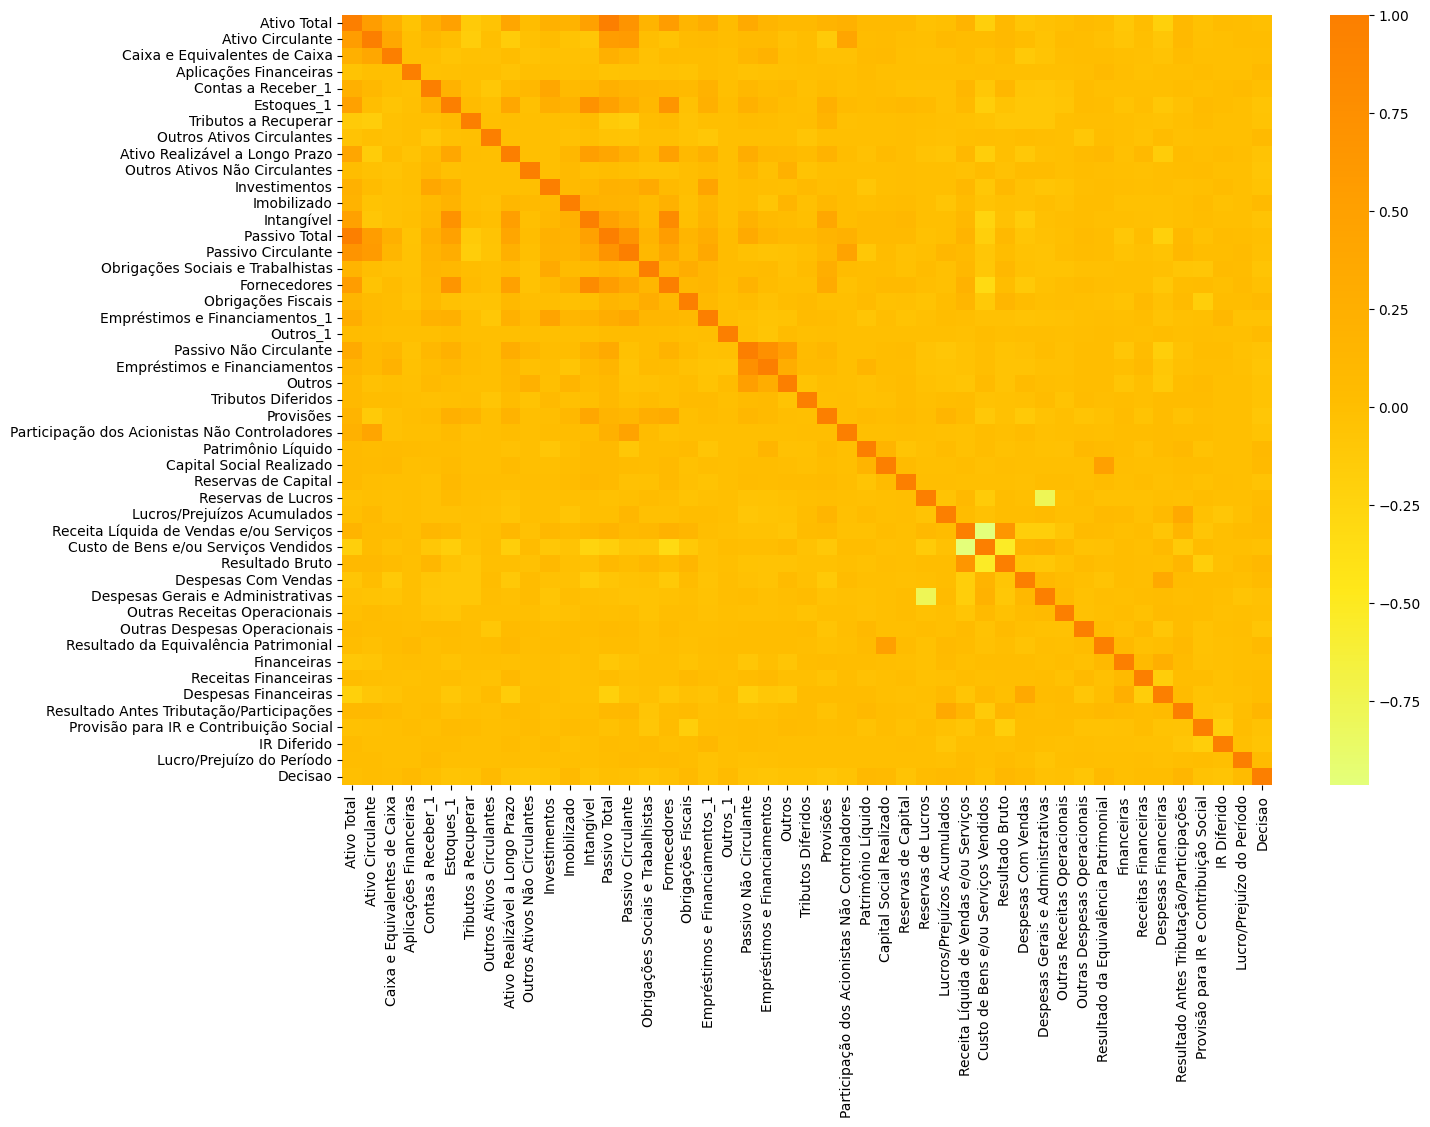

In [255]:
correlations = db.corr()

fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(correlations, cmap="Wistia", ax=ax)
plt.show()


In [256]:
correlacoes_encontradas = []
for coluna in correlations:
    for linha in correlations.index:
        if linha != coluna:
            valor = abs(correlations.loc[linha, coluna])
            if valor > 0.8 and (coluna, linha, valor) not in correlacoes_encontradas:
                correlacoes_encontradas.append((linha, coluna, valor))
                print(f"Correlação Encontrada: {linha} e {coluna}. Valor: {valor}")

Correlação Encontrada: Passivo Total e Ativo Total. Valor: 1.0
Correlação Encontrada: Fornecedores e Intangível. Valor: 0.8185271159601817
Correlação Encontrada: Custo de Bens e/ou Serviços Vendidos e Receita Líquida de Vendas e/ou Serviços. Valor: 0.9636223786492788


#### Removing highly correlated columns 

In [257]:
remover = ['Ativo Circulante', 'Contas a Receber_1', 'Tributos a Recuperar', 'Passivo Total', 'Passivo Circulante', 'Patrimônio Líquido', 'Capital Social Realizado', 'Receita Líquida de Vendas e/ou Serviços', 'Resultado Bruto', 'Despesas Gerais e Administrativas']
base_dados = db.drop(remover, axis=1)

In [258]:
print(base_dados.shape)

(401, 37)


### Feature Selection

In [259]:
base_dados.count()

Ativo Total                                      401
Caixa e Equivalentes de Caixa                    401
Aplicações Financeiras                           401
Estoques_1                                       401
Outros Ativos Circulantes                        401
Ativo Realizável a Longo Prazo                   401
Outros Ativos Não Circulantes                    401
Investimentos                                    401
Imobilizado                                      401
Intangível                                       401
Obrigações Sociais e Trabalhistas                401
Fornecedores                                     401
Obrigações Fiscais                               401
Empréstimos e Financiamentos_1                   401
Outros_1                                         401
Passivo Não Circulante                           401
Empréstimos e Financiamentos                     401
Outros                                           401
Tributos Diferidos                            

In [260]:
base_dados.dropna(inplace=True)

In [261]:
from sklearn.ensemble import ExtraTreesClassifier

modelo = ExtraTreesClassifier(random_state=1)
x = base_dados.drop("Decisao", axis=1)
y = base_dados["Decisao"]
modelo.fit(x, y)

caracteristicas_importantes = pd.DataFrame(modelo.feature_importances_, x.columns).sort_values(by=0, ascending=False)
display(caracteristicas_importantes)
top10 = list(caracteristicas_importantes.index)[:10]
print(top10)

,0
Outras Despesas Operacionais,0.036986
Obrigações Fiscais,0.034278
Resultado da Equivalência Patrimonial,0.033697
Estoques_1,0.031710
Tributos Diferidos,0.031338
Outros Ativos Circulantes,0.031262
Empréstimos e Financiamentos_1,0.031024
Lucro/Prejuízo do Período,0.030718
Outros Ativos Não Circulantes,0.030400
Fornecedores,0.029513


['Outras Despesas Operacionais', 'Obrigações Fiscais', 'Resultado da Equivalência Patrimonial', 'Estoques_1', 'Tributos Diferidos', 'Outros Ativos Circulantes', 'Empréstimos e Financiamentos_1', 'Lucro/Prejuízo do Período', 'Outros Ativos Não Circulantes', 'Fornecedores']


### Applying StandardScaler for data normalization

In [262]:
from sklearn.preprocessing import StandardScaler

def ajustar_scaler(tabela_original):
    scaler = StandardScaler()
    tabela_auxiliar = tabela_original.drop("Decisao", axis=1)
    
    tabela_auxiliar = pd.DataFrame(scaler.fit_transform(tabela_auxiliar), tabela_auxiliar.index, tabela_auxiliar.columns)
    tabela_auxiliar["Decisao"] = tabela_original["Decisao"]
    return tabela_auxiliar

nova_base_dados = ajustar_scaler(base_dados)
top10.append("Decisao") 

nova_base_dados = nova_base_dados[top10].reset_index(drop=True)
display(nova_base_dados)

,Outras Despesas Operacionais,Obrigações Fiscais,Resultado da Equivalência Patrimonial,Estoques_1,Tributos Diferidos,Outros Ativos Circulantes,Empréstimos e Financiamentos_1,Lucro/Prejuízo do Período,Outros Ativos Não Circulantes,Fornecedores,Decisao
0,0.057597,-1.337246,-2.046710,-1.266256,-0.836015,-0.011210,-0.966733,-0.056799,-0.102550,-1.240110,0
1,0.057597,-0.047101,0.035834,-0.146024,-0.053392,-0.074440,-0.768840,-0.050512,-0.070860,-0.026093,0
2,0.057597,0.057580,0.057321,-0.365078,-0.011453,-0.071443,-0.620160,-0.049752,-0.067605,-0.135154,2
3,0.057597,-0.069906,-0.733593,-0.090344,-0.098249,-0.072396,0.179507,-0.051046,-0.057666,-0.119049,2
4,0.057597,0.564801,0.086267,-0.078487,-0.128264,-0.071437,-0.506369,-0.050208,-0.071674,0.185458,2
...,...,...,...,...,...,...,...,...,...,...,...
396,-0.097180,4.023274,-0.175104,0.080258,0.141139,-0.071704,0.109227,-0.048452,-0.178111,-0.384109,0
397,0.178030,-1.424861,0.110795,0.408192,-0.045386,-0.074115,-0.255371,-0.052255,-0.178111,0.231478,0
398,0.099984,0.154712,-0.321565,0.037560,-0.444034,-0.071684,-0.145171,-0.049389,-0.178111,-0.095416,2
399,0.078836,-0.837159,0.221302,-0.492710,-0.250936,-0.071991,0.119286,-0.052255,-0.178111,-0.645639,0


### Splitting training and testing data

In [263]:
fundaments3 = fundaments.copy()
for company in fundaments3:
    fundaments3[company].dropna(inplace=True)

In [264]:
from sklearn.model_selection import train_test_split

x = nova_base_dados.drop("Decisao", axis=1)
y = nova_base_dados["Decisao"]

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, random_state=1)

### Creating de um Dummy Classifier

In [265]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, confusion_matrix

dummy = DummyClassifier(strategy="stratified", random_state=2)
dummy.fit(x_treino, y_treino)
previsao_dummy = dummy.predict(x_teste)

### Avaliation metrics

1. Precision
2. Recal


Dummy
              precision    recall  f1-score   support

           0       0.54      0.53      0.54        62
           2       0.28      0.28      0.28        39

    accuracy                           0.44       101
   macro avg       0.41      0.41      0.41       101
weighted avg       0.44      0.44      0.44       101



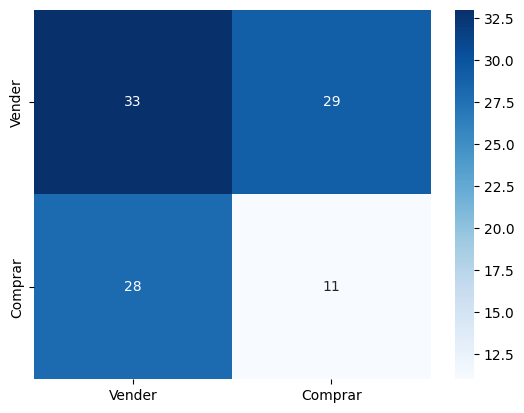

##################################################


In [266]:
def avaliar(y_teste, previsoes, nome_modelo):
    print(nome_modelo)
    report = classification_report(y_teste, previsoes)
    print(report)
    cf_matrix = pd.DataFrame(confusion_matrix(y_teste, previsoes), index=["Vender", "Comprar"], columns=["Vender", "Comprar"])
    sns.heatmap(cf_matrix, annot=True, cmap="Blues", fmt=',')
    plt.show()
    print("#" * 50)
    
    
avaliar(y_teste, previsao_dummy, "Dummy")

### Models to be considered
- AdaBoost
- Decision Tree
- Random Forest
- ExtraTree
- Gradient Boost
- K Nearest Neighbors (KNN)
- Logistic Regression
- Naive Bayes
- Support Vector Machine (SVM)
- Rede Neural

In [267]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

modelos = {
    "AdaBoost": AdaBoostClassifier(random_state=1),
    "DecisionTree": DecisionTreeClassifier(random_state=1),
    "RandomForest": RandomForestClassifier(random_state=1),
    "ExtraTree": ExtraTreesClassifier(random_state=1),
    "GradientBoost": GradientBoostingClassifier(random_state=1),
    "KNN": KNeighborsClassifier(),
    "LogisticRegression": LogisticRegression(random_state=1),
    "NaiveBayes": GaussianNB(),
    "SVM": SVC(random_state=1),
    "RedeNeural": MLPClassifier(random_state=1, max_iter=400),
}

AdaBoost
              precision    recall  f1-score   support

           0       0.72      0.55      0.62        62
           2       0.48      0.67      0.56        39

    accuracy                           0.59       101
   macro avg       0.60      0.61      0.59       101
weighted avg       0.63      0.59      0.60       101



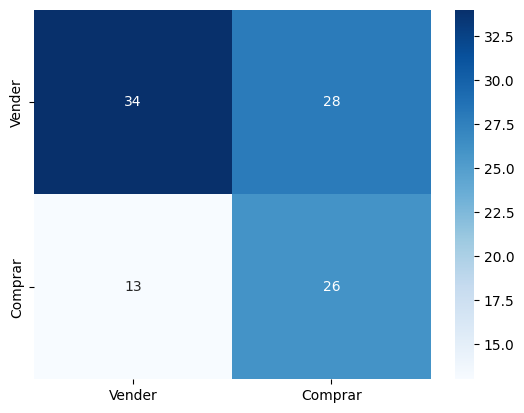

##################################################
DecisionTree
              precision    recall  f1-score   support

           0       0.72      0.68      0.70        62
           2       0.53      0.59      0.56        39

    accuracy                           0.64       101
   macro avg       0.63      0.63      0.63       101
weighted avg       0.65      0.64      0.65       101



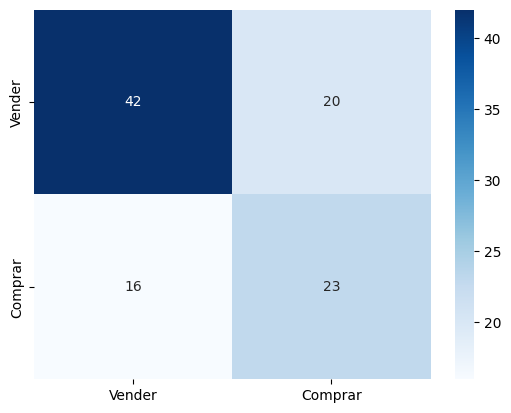

##################################################
RandomForest
              precision    recall  f1-score   support

           0       0.72      0.69      0.70        62
           2       0.54      0.56      0.55        39

    accuracy                           0.64       101
   macro avg       0.63      0.63      0.63       101
weighted avg       0.65      0.64      0.65       101



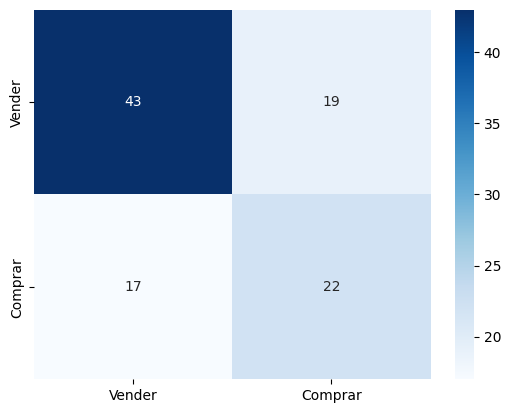

##################################################
ExtraTree
              precision    recall  f1-score   support

           0       0.68      0.58      0.63        62
           2       0.46      0.56      0.51        39

    accuracy                           0.57       101
   macro avg       0.57      0.57      0.57       101
weighted avg       0.59      0.57      0.58       101



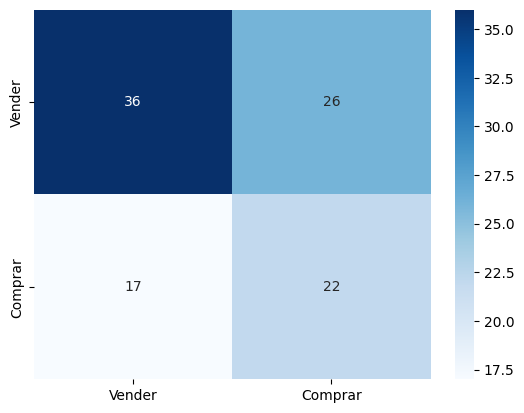

##################################################
GradientBoost
              precision    recall  f1-score   support

           0       0.71      0.56      0.63        62
           2       0.48      0.64      0.55        39

    accuracy                           0.59       101
   macro avg       0.60      0.60      0.59       101
weighted avg       0.62      0.59      0.60       101



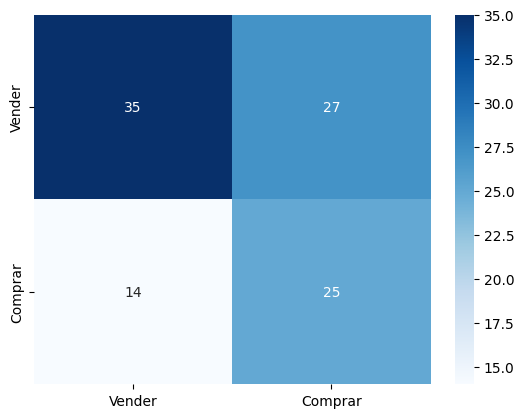

##################################################
KNN
              precision    recall  f1-score   support

           0       0.62      0.52      0.56        62
           2       0.39      0.49      0.43        39

    accuracy                           0.50       101
   macro avg       0.50      0.50      0.50       101
weighted avg       0.53      0.50      0.51       101



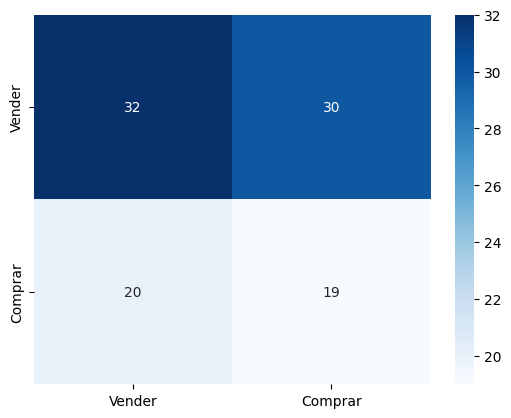

##################################################
LogisticRegression
              precision    recall  f1-score   support

           0       0.62      0.77      0.69        62
           2       0.42      0.26      0.32        39

    accuracy                           0.57       101
   macro avg       0.52      0.52      0.50       101
weighted avg       0.54      0.57      0.55       101



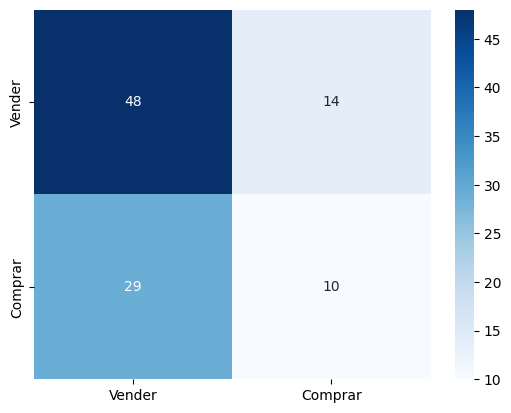

##################################################
NaiveBayes
              precision    recall  f1-score   support

           0       0.62      0.95      0.75        62
           2       0.50      0.08      0.13        39

    accuracy                           0.61       101
   macro avg       0.56      0.51      0.44       101
weighted avg       0.57      0.61      0.51       101



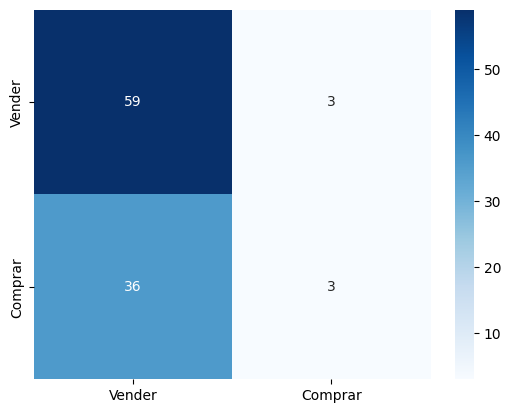

##################################################
SVM
              precision    recall  f1-score   support

           0       0.64      0.77      0.70        62
           2       0.46      0.31      0.37        39

    accuracy                           0.59       101
   macro avg       0.55      0.54      0.53       101
weighted avg       0.57      0.59      0.57       101



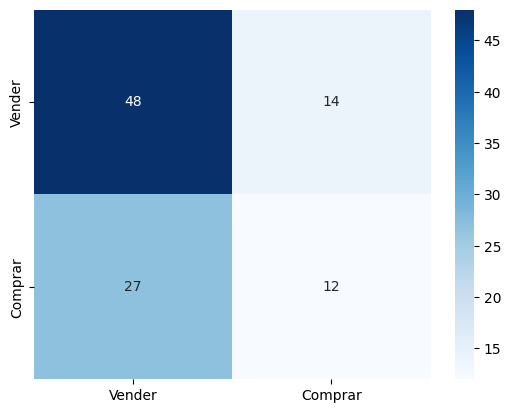

##################################################
RedeNeural
              precision    recall  f1-score   support

           0       0.61      0.53      0.57        62
           2       0.38      0.46      0.42        39

    accuracy                           0.50       101
   macro avg       0.50      0.50      0.49       101
weighted avg       0.52      0.50      0.51       101



/Users/cassio/Documents/Investiments - Final/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


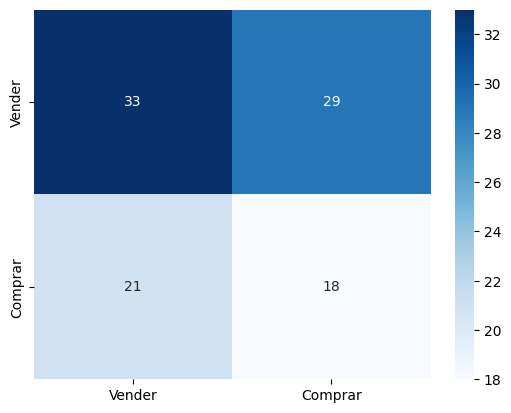

##################################################


In [268]:
for nome_modelo in modelos:
    modelo = modelos[nome_modelo]
    modelo.fit(x_treino, y_treino)
    previsoes = modelo.predict(x_teste)
    avaliar(y_teste, previsoes, nome_modelo)
    modelos[nome_modelo] = modelo

### Tunning the model

In [269]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, precision_score

modelo_final = modelos["RandomForest"]

n_estimators = range(10, 251, 30)
max_features = list(range(2, 11, 2))
max_features.append('auto')
min_samples_split = range(2, 11, 2)

precision2_score = make_scorer(precision_score, labels=[2], average='macro')

grid = GridSearchCV(
        estimator=RandomForestClassifier(),
        param_grid={
            'n_estimators': n_estimators,
            'max_features': max_features,
            'min_samples_split': min_samples_split,
            'random_state': [1],
        },
        scoring=precision2_score,
)

resultado_grid = grid.fit(x_treino, y_treino)
print("Ajuste feito")

Ajuste feito


/Users/cassio/Documents/Investiments - Final/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
225 fits failed out of a total of 1350.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
225 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/cassio/Documents/Investiments - Final/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/cassio/Documents/Investiments - Final/.venv/lib/python3.12/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/Users/cassio/Documents/Investiments - Final/.venv/lib/python3.

RandomForest Tunado
              precision    recall  f1-score   support

           0       0.69      0.58      0.63        62
           2       0.47      0.59      0.52        39

    accuracy                           0.58       101
   macro avg       0.58      0.59      0.58       101
weighted avg       0.61      0.58      0.59       101



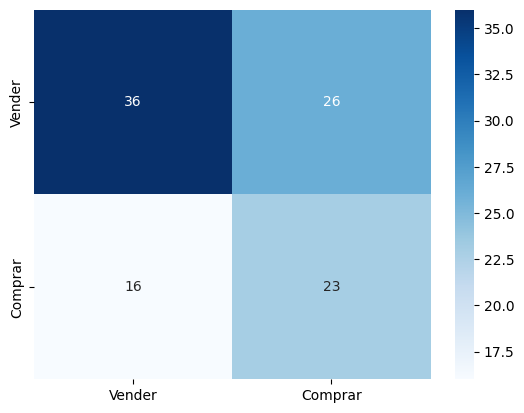

##################################################


In [270]:
modelo_tunado = resultado_grid.best_estimator_
previsoes = modelo_tunado.predict(x_teste)
avaliar(y_teste, previsoes, "RandomForest Tunado")

### Treating the data of the last quarter for validation

In [271]:
ult_tri_fundamentos = fundaments.copy()
ult_tri_base_dados = pd.DataFrame()
lista_empresas = []
for empresa in ult_tri_fundamentos:
    ult_tri_fundamentos[empresa] = ult_tri_fundamentos[empresa][-1:]
    ult_tri_fundamentos[empresa] = ult_tri_fundamentos[empresa].reset_index(drop=True)
    ult_tri_base_dados = pd.concat([ult_tri_base_dados, (ult_tri_fundamentos[empresa])])
    lista_empresas.append(empresa)
display(ult_tri_base_dados)
print(lista_empresas)

,Ativo Total,Ativo Circulante,Caixa e Equivalentes de Caixa,Aplicações Financeiras,Contas a Receber_1,Estoques_1,Tributos a Recuperar,Outros Ativos Circulantes,Ativo Realizável a Longo Prazo,Outros Ativos Não Circulantes,...,Outras Despesas Operacionais,Resultado da Equivalência Patrimonial,Financeiras,Receitas Financeiras,Despesas Financeiras,Resultado Antes Tributação/Participações,Provisão para IR e Contribuição Social,IR Diferido,Lucro/Prejuízo do Período,Decisao
0,0.031680,0.110779,0.470028,0.175440,0.003098,-0.039879,-0.095753,-0.096427,0.030171,-1.000000,...,-1.000000,-1.000000,0.746183,0.240140,0.203302,0.253790,1.000000,-1.000000,0.738361,0
0,0.027391,0.026304,0.114335,-0.384200,-0.015884,0.068618,0.172751,-0.025106,-0.312683,0.069819,...,-1.088154,3.446338,0.668761,2.392969,0.576234,-0.237443,0.565634,0.591266,-0.072947,0
0,0.028218,-0.010894,0.000380,-1.000000,0.015688,0.005290,-0.071511,-0.074789,0.080574,0.278451,...,0.240270,0.398424,-0.662252,0.228205,-0.541560,0.388881,0.041504,-0.071618,0.394455,0
0,0.042113,-0.066039,-0.757485,0.025060,-0.031939,0.075179,0.011905,1.742943,0.185512,-1.000000,...,-1.000000,-0.751398,1.246264,1.128650,-0.428195,0.175315,-0.212841,1.000000,0.165701,0
0,-0.014641,-0.096069,-0.210989,0.178183,0.035174,0.035968,-0.053483,0.464569,0.338638,-1.000000,...,-2.201752,0.143065,1.000000,4.803230,0.271435,2.481764,1.000000,-1.000000,1.983122,0
0,-0.034515,-0.030548,-0.056867,-0.049530,-0.040030,-0.055686,-0.534578,0.992671,-0.092355,-1.000000,...,0.266617,1.775739,1.000000,0.127985,1.000000,1.000000,-0.614220,-1.000000,1.000000,0
0,-0.000753,0.109900,0.124832,0.131808,0.083704,0.039464,0.398200,-1.000000,-0.239784,-1.000000,...,0.312814,-0.786085,1.000000,-0.284419,1.000000,1.000000,1.000000,-1.000000,1.000000,0
0,0.059897,0.027413,-0.082243,-0.535080,0.197190,-0.258620,0.019020,0.541541,0.109122,-1.000000,...,-0.119969,1.344251,-2.347860,-0.627637,-0.169479,1.170663,0.743224,-1.000000,1.335015,0
0,0.035613,0.284188,0.551566,0.012618,0.257225,0.650738,-1.000000,0.498870,-0.054095,-0.229375,...,-114.223046,1.000000,1.000000,1.000000,-1.000000,0.068248,0.082458,-0.142824,0.018713,0
0,0.020156,0.128942,0.106945,0.484284,-0.102043,0.031829,2.973313,-0.488958,-0.006911,-0.020472,...,-3.878839,0.044465,-1.744647,-1.000000,-1.323825,0.580550,-1.650479,-0.704823,0.259449,0


['MRFG3', 'ITSA4', 'CIEL3', 'PRIO3', 'TAEE11', 'BRAP4', 'JBSS3', 'MGLU3', 'PETR4', 'CYRE3', 'YDUQ3', 'GOLL4', 'SBSP3', 'MULT3', 'ECOR3', 'MRVE3', 'EZTC3', 'CCRO3', 'BRML3', 'ELET6', 'VALE3', 'ABEV3', 'HYPE3', 'SUZB3', 'EQTL3', 'BEEF3', 'BRKM5', 'ENBR3', 'CPFE3', 'JHSF3', 'RENT3', 'SULA11', 'CSNA3', 'GOAU4', 'WEGE3', 'BRFS3', 'USIM5', 'ENGI11', 'COGN3', 'LAME4', 'ENEV3', 'VVAR3', 'CPLE6', 'IGTA3', 'PCAR3', 'HGTX3', 'TOTS3', 'UGPA3', 'EGIE3', 'GGBR4', 'LREN3', 'CSAN3', 'QUAL3', 'EMBR3', 'BTOW3', 'CMIG4', 'B3SA3', 'FLRY3', 'RADL3', 'VIVT3', 'LCAM3']


In [272]:
ult_tri_base_dados = ult_tri_base_dados.reset_index(drop=True)
ult_tri_base_dados = ult_tri_base_dados[top10]
ult_tri_base_dados = ajustar_scaler(ult_tri_base_dados)
ult_tri_base_dados = ult_tri_base_dados.drop("Decisao", axis=1)
display(ult_tri_base_dados)

,Outras Despesas Operacionais,Obrigações Fiscais,Resultado da Equivalência Patrimonial,Estoques_1,Tributos Diferidos,Outros Ativos Circulantes,Empréstimos e Financiamentos_1,Lucro/Prejuízo do Período,Outros Ativos Não Circulantes,Fornecedores
0,0.220964,-0.921632,-1.108464,-0.065009,0.054719,-0.342631,0.445411,0.068745,-0.537273,-0.426072
1,0.217494,-0.818241,2.734384,0.302692,0.180183,-0.221474,-0.061299,-0.630659,0.283329,-0.229970
2,0.269789,0.073937,0.100155,0.088073,0.031098,-0.305874,0.034645,-0.227726,0.443360,-0.629899
3,0.220964,1.255948,-0.893604,0.324928,-1.372776,2.782034,-1.317838,-0.424928,-0.537273,1.697758
4,0.173656,0.642070,-0.120544,0.192039,-0.038534,0.610371,-0.526319,1.141817,-0.537273,0.073821
5,0.270826,-1.193001,1.290531,-0.118580,-1.362129,1.507496,-0.727994,0.294296,-0.537273,-0.434197
6,0.272645,1.070213,-0.923583,0.203889,3.524546,-1.877594,-0.083171,0.294296,-0.537273,-0.315439
7,0.255608,0.055091,0.917608,-0.806333,0.294359,0.741129,0.039821,0.583102,-0.537273,0.267669
8,-4.236202,-2.598483,0.620081,2.275524,0.032485,0.668640,3.327130,-0.551642,0.053833,3.538184
9,0.107635,1.599697,-0.205762,0.178014,0.468076,-1.009452,-0.495804,-0.344110,0.214072,0.004357


In [273]:
previsoes_ult_tri = modelo_tunado.predict(ult_tri_base_dados)
print(previsoes_ult_tri)

carteira = []
carteira_inicial = []
try:
    for i, empresa in enumerate(ult_tri_fundamentos):
        print(empresa)
        if previsoes_ult_tri[i] == 2:
            carteira_inicial.append(1000)
            cotacao = stock_values[empresa]
            cotacao = cotacao.set_index("Date")
            cotacao_inicial = cotacao.loc["2020-12-31", "Adj Close"]
            cotacao_final = cotacao.loc["2021-03-31", "Adj Close"]
            percentual = cotacao_final / cotacao_inicial
            carteira.append(1000 * percentual)

        
    saldo_inicial = sum(carteira_inicial)
    saldo_final = sum(carteira)
    print(saldo_inicial, saldo_final)
    print(saldo_final / saldo_inicial)
except:
    pass

[0 2 0 0 0 2 0 2 2 2 0 0 2 2 0 0 2 0 2]
MRFG3
ITSA4
CIEL3
PRIO3
TAEE11
BRAP4
JBSS3
MGLU3
PETR4
CYRE3
YDUQ3
GOLL4
SBSP3
MULT3
ECOR3
MRVE3
EZTC3
CCRO3
BRML3
ELET6


### Agora fazemos a previsão de decisões

In [274]:
variacao_ibov = ibov_df.loc["2021-03-31", "IBOV"] / ibov_df.loc["2020-12-31", "IBOV"]
print(variacao_ibov)

0.9776038086936114


In [275]:
0.9890493140740175/0.9776038086936114









1.0117077135733554

### Credits

Author: Cassio Dalla Barba Everling

Inspiration: Hashtag Programacao